# Chapter 3
## Learning as optimization


    Hand-in bug-free (try "Kernel" > "Restart & Run All") and including all (textual as well as figural) output via Blackboard before the deadline (see Blackboard).
    
Learning goals:
1. get familiar with partial derivatives
1. get familiar with gradient descent
1. get familiar with the cross-entropy loss function
1. get familiar with optimizing a one-layer neural network with gradient descent

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Exercise 1: A simple parabola (0.25 points)
Consider a simple parabola: $y=x^2$. Write a function `f(x)` that computes and returns $y$ given any $x$. Additionally, write a function `df(x)` that computes and returns the derivative of this parabola at any $x$. 

We will use these functions to find the minimum of $y$ with gradient descent. Of course, one could do so by setting the derivative to zero and solving the problem analytically. Note however, that in real-world cases (e.g., for complex neural networks), we usually can not find a closed form solution for finding the minimum of the derivative, analytically. 

In [5]:
def f(x):
    y = x**2
    return y

def df(x):
    dy = 2*x
    return dy

### Exercise 2: Gradient descent (1 point)
Write a function `gradient_descent(function,derivative,x0,eta,n)` that performs gradient descent on $y=x^2$ from a given starting x position $x_0$. It should use the given learning rate $\eta$ and perform $n$ steps. Note that gradient descent has a very simple formula, based on the previous $x$ position. The function should save and return the trajectories for $x$ and $y$, as in the next exercise we want to observe what gradient descent does for different parameters. 

In [24]:
def gradient_descent(function, derivative, x0, eta, n):
    x = np.repeat(0,n)
    y = np.repeat(0,n)
    x[0] = x0
    for i in range(n-1):
        x[i+1] = x[i] - eta*df(x[i])
        y[i] = f(x[i])
    return x, y

### Exercise 3: Very low learning rate (0.25 points)
We want to show the gradient descent trajectories for different learning rates. Create a plot that shows the parabola $y=x^2$ and a marker for the starting point of gradient descent $(x_0, f(x_0))$. We use $x_0=-7.5$ and $n=50$. Plot $(x_t,f(x_t))$ at each step (i.e. the returned trajectories) for $\eta=0.001$. What do you observe? Is this a good learning rate?

### Solution 3

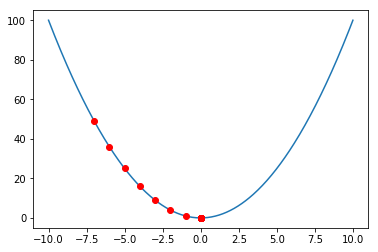

In [30]:
# Run gradient descent, get gradient descent trajectory x and y
gx, gy = gradient_descent(f, df, -7.5, 0.001, 50)

# Plot parabola f(x), starting point, gradient descent trajectory (x vs. y)
x = np.arange(-10,10.05,0.05)

plt.figure()
plt.plot(x, f(x))
plt.plot(gx, gy,'ro')
plt.show()

#This seems to be a good learning rate, because it fits the data very well. However, it probably overfits the data. 

### Exercise 4: Low learning rate (0.25 points)
We want to show the gradient descent trajectories for different learning rates. Create a plot that shows the parabola $y=x^2$ and a marker for the starting point of gradient descent $(x_0, f(x_0))$. We use $x_0=-7.5$ and $n=50$. Plot $(x_t,f(x_t))$ at each step (i.e. the returned trajectories) for $\eta=0.05$. What do you observe? Is this a good learning rate?

### Solution 4

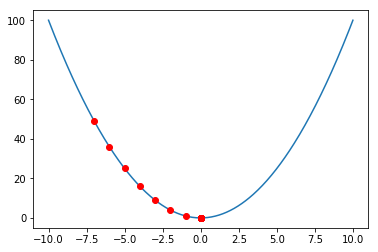

In [31]:
# Run gradient descent, get gradient descent trajectory x and y
gx, gy = gradient_descent(f, df, -7.5, 0.05, 50)

# Plot parabola f(x), starting point, gradient descent trajectory (x vs. y)
x = np.arange(-10,10.05,0.05)

plt.figure()
plt.plot(x, f(x))
plt.plot(gx, gy, 'ro')
plt.show()

#This seems to be a good learning rate, because it fits the data very well. 

### Exercise 5: High learning rate (0.25 points)
We want to show the gradient descent trajectories for different learning rates. Create a plot that shows the parabola $y=x^2$ and a marker for the starting point of gradient descent $(x_0, f(x_0))$. We use $x_0=-7.5$ and $n=50$. Plot $(x_t,f(x_t))$ at each step (i.e. the returned trajectories) for $\eta=0.5$ What do you observe? Is this a good learning rate?

### Solution 5

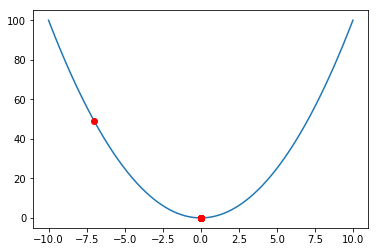

In [32]:
# Run gradient descent, get gradient descent trajectory x and y
gx, gy = gradient_descent(f, df, -7.5, 0.5, 50)

# Plot parabola f(x), starting point, gradient descent trajectory (x vs. y)
x = np.arange(-10,10.05,0.05)

plt.figure()
plt.plot(x, f(x))
plt.plot(gx, gy, 'ro')
plt.show()

#This doesn't seem to be a very good fit. The learning rate is too high because the steps inbetween are too large.

### Exercise 6: Very high learning rate (0.25 points)
We want to show the gradient descent trajectories for different learning rates. Create a plot that shows the parabola $y=x^2$ and a marker for the starting point of gradient descent $(x_0, f(x_0))$. We use $x_0=-7.5$ and $n=50$. Plot $(x_t,f(x_t))$ at each step (i.e. the returned trajectories) for $\eta=1.01$. What do you observe? Is this a good learning rate?

### Solution 6

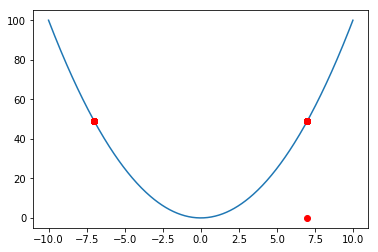

In [33]:
# Run gradient descent, get gradient descent trajectory x and y
gx, gy = gradient_descent(f, df, -7.5, 1.01, 50)

# Plot parabola f(x), starting point, gradient descent trajectory (x vs. y)
x = np.arange(-10,10.05,0.05)

plt.figure()
plt.plot(x, f(x))
plt.plot(gx, gy, 'ro')
plt.show()

#This is just too much, it completely overshoots.

### Exercise 7: Cross-entropy loss (1 point)
The cross-entropy loss is a common loss function used for classification, and is given by:
$$L = \frac{1}{N} \sum^N - t^{(n)}\log(y^{(n)}) - (1 - t^{(n)})\log(1 - y^{(n)})$$
Here, $t^{(n)}$ is the target (real value) which is either 0 or 1, and $y^{(n)}$ the prediction of the $n$th example is a continues value between 0 and 1 (output of a sigmoid activation).

The cross-entropy loss is low (towards zero) when the MLP is precisely right (true negatives, true positives). It is high (towards infinity) when the MLP is all wrong (false negatives, false positives). Read and understand the function to verify that this is indeed the case (i.e., what happens when $y\neq t$ and when $y=t$). 

We need the derivative of the cross-entropy loss function with respect to $y$ to do gradient descent (i.e., backpropagation) to tweak the parameters (i.e., the weights) for classification. Derive the cross-entropy loss function with respect to $y$, i.e. derive $\frac{\partial L}{\partial y}$. You can ignore the sum over the batch; use: $L = -t \log(y) - (1 - t)\log(1 - y)$. Simplify the derivation as much as possible (i.e. to one fraction of two terms). 

### Solution 7:
$\frac{\partial{L}}{\partial{y}} = \frac{\partial -t\log(y)-(1-t)\log(1-y)}{\partial y} = \frac{t-y}{(1-y)y}$



### Exercise 8: The sigmoid activation function (1 point)
The sigmoid activation function is an activation function that squeezes its input into the range of 0 and 1. This is convenient, especially as $y$ at the output, and also somewhat interpretable as a probability for a certain class. The sigmoid is given by:

$$f(a) = \frac{1}{1+\exp(-a)}$$

Derive the derivative of the sigmoid activation function with respect to the activation $a$, and show that the derivative is equal to a combination of two sigmoids: 

$$\frac{\partial f(a)}{\partial a} = \frac{\partial y}{\partial a} = f(a)(1 - f(a))$$

This simple derivative is another convenient property of the sigmoid activation function.

### Solution 8
Write $\LaTeX$ here.

### Exercise 9: The forward pass (0.5 points)
We are going to build a one-layer network to classify digits. The inputs $x$ are images of handwritten digits. Here, we restrict the problem to binary classification, so we classify only two possible digits (0 and 1). This means that we need only one a single output unit $y$. 

In the forward pass the input $x$ is weighted by one layer of weights $w$. Then this activation $a$ is passed on into the sigmoid unit activation function, producing $y$. 

Write down the equations for the activation $a$ and the output $y$.

### Solution 9:
Add $\LaTeX$ here.

\begin{eqnarray*}
a &=& \sum^n{w_n*x_n} \\
y &=&  \\
\end{eqnarray*}

### Exercise 10: The backward pass (1 point)

To update the weights so that the loss is further reduced (i.e. to gradually let the network learn to do the right thing), we need the partial derivatives of the weights. To compute the partial derivatives of the weights $w$, we have to propagate from the error function back through the activation function to the weights. Note that we do not have to handle any hidden units and their activations in this one-layer network. 

Obtain $\frac{\partial L}{\partial w}$ by applying the chain rule multiple times. Note that $L$ is the cross-entropy loss, that you have already derived $\frac{\partial L}{\partial y}$ and $\frac{\partial y}{\partial a}$ further above, and that $\frac{\partial a}{\partial w}$ has a trivial derivative. Simplify $\frac{\partial L}{\partial w}$ as much as possible.

### Solution 10:
Write $\LaTeX$ here.

### Exercise 11: Implementation (2.25 points)
Now that all the math is done, we can start implementing the one-layer network for binary classification of two digits, where we make use of sigmoid units and the cross-entropy loss. Write the following functions:
1. `cross_entropy(Y, T)`: Computes the cross entropy loss. Make sure that there are no exact-zero inputs for `np.log()` (something simple like adding a very small number if `Y` is 0 is fine). 
1. `sigmoid(A)`: Passes the activity `A` through the sigmoid activation function.
1. `linear(X, W)`: Computes the activities `A` as `X` weighted by `W`.
1. `forward(X, W)`: Computes the forward pass for the one-layer network with a sigmoid output unit. Returns `Y`. 
1. `backward(X, Y, T)`: Computes the backward pass for the one-layer network with a sigmoid output unit and cross-entropy loss.
1. `train_network(X_train, T_train, X_val, T_val, n_epochs, eta)`: Implement the training procedure (learn the weights). See the skeleton code for some help.
1. `test_network(X, W)`: Predicts new examples given as `X`, returns classes as a binary label vector (for classes 0 and 1). Interpret the output of the network (the sigmoid) as a probability for class 1 and transform these probabilities to this binary label vector.

### Solution 11

In [ ]:
def cross_entropy(Y, T):
    """
    Computes the cross-entropy loss.
    INPUT:
        Y = [1 N] output vector for N examples
        T = [1 N] tagret vector for N examples
    OUTPUTS
        L = [1 1] the mean cross-entropy loss
    """
    ###  Add your code here. ###
    return L

In [ ]:
def sigmoid(A):
    """
    Computes the sigmoid activation function.
    INPUT:
        A = [K N] activity matrix of K units for N examples
    OUTPUT
        Y = [K N] output matrix of K units for N examples
    """
    ###  Add your code here. ###
    return Y

In [ ]:
def linear(X, W):
    """
    Computes the activities for a fully connected layer.
    INPUT:
        X = [P N] data matrix of P input units for N examples
        W = [Q P] weight matrix of P inputs to Q outputs
    OUTPUT
        A = [Q N] activity matrix of Q output units for N examples
    """
    ###  Add your code here. ###
    return A

In [ ]:
def forward(X, W):
    """
    Computes the forward pass for a one-layer network with sigmoid units.
    INPUT
        X = [P N] data matrix of P inputs for N examples
        W = [1 P] weight matrix of the first layer of P inputs to 1 output
    OUTPUT
        Y = [1 N] output vector for N examples
    """
    ###  Add your code here. ###
    return Y

In [ ]:
def backward(X, Y, T):
    """
    Computes the backward pass for a one-layer network with sigmoid units and cross-entropy loss.
    INPUT:
        X  = [P N] data matrix of P inputs for N examples
        Y  = [1 N] a vector of predictions for N examples
        T  = [1 N] a vector of targets for N examples
    OUTPUT
        dW = [1 P] gradient matrix for the weights of P inputs to 1 output
    """
    ###  Add your code here. ###
    return dW

In [ ]:
def train_network(X_train, T_train, X_val, T_val, n_epochs=100, eta=0.001):
    """
    Performs the training procedure for a one-layer network with sigmoid units and cross-entropy loss.
    INPUT:
        X_train  = [P N] data matrix of P inputs for N training examples
        T_train  = [1 N] a vector of targets for N training examples 
                   (labels for digits 0 or 1; given as numbers 0 or 1)
        X_val    = [P M] data matrix of P inputs for N training examples
        T_val    = [1 M] a vector of targets for N training examples
        n_epochs = [1 1] number of training epochs (default 100)
        eta      = [1 1] learning rate (default 0.001)
    OUTPUT:
        W          = [1 P] the learned weights of P inputs to 1 outputs
        train_loss = [Z 1] the training loss for Z epochs
        val_loss   = [Z 1] the validation loss for Z epochs
    """
    
    # Weight initialization
    W = np.random.randn(1, X.shape[0])
    
    # Arrays for saving losses
    train_loss = np.zeros((n_epochs))
    val_loss = np.zeros((n_epochs))

    # Loop over epochs
    for i_epoch in xrange(n_epochs):
        
        # Forward pass for current network (i.e. with current W)
        # (obtaining Y_train)
        ###  Add your code here. ###
        
        # Backward pass
        # (obtaining dW)
        ###  Add your code here. ###
        
        # Parameter update
        # (adjusting W with given learning rate)
        ###  Add your code here. ###
        
        # Save losses for train and validation set (compute with cross entropy loss function)
        ###  Add your code here. ###
        
        # Print progress and loss
        if i_epoch % 10 == 0:
            print("Epoch {}/{}. Train loss: {}. Validation loss: {}.".format(
                1+i_epoch, n_epochs, train_loss[i_epoch], val_loss[i_epoch]))
        
    return W, train_loss, val_loss

In [ ]:
def test_network(X, W):
    """
    Applies the trained one-layer network with sigmoid units to classify data.
    INPUT:
        X = [P N] data matrix of P inputs for N examples
        W = [1 P] weight matrix of P inputs to 1 output
    OUTPUT
        Y = [1 N] output vector (i.e., predicted labels) for N examples
    """
    ###  Add your code here. ###
    return Y

### Exercise 12: Training (1 point)
Now that we have done all the work, we can finally run the network. Below we first load in the digit dataset, and restrict it to two digits. We split this data into a training and a test set. 

Train your network on the training dataset `X_train` and `T_train`, and validate it at each epoch on the test set `X_val` and `T_val`. After training, plot the train and validation losses over epochs (as returned by `train_network()`.

In [ ]:
# Read full dataset from mat file
mat = sio.loadmat("digits.mat")
X = mat["digits"]
T = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 0]).repeat(1000)
sz = (28, 28)

In [ ]:
# Select only digits 0 and 1 for binary classification
digits = np.array([0, 1])
idx = np.in1d(T, digits)
X = X[:, idx]
T = np.array([0, 1]).repeat(1000)  # class labels given as 0 and 1 then

In [ ]:
# Plot an example of both classes
fig, ax = plt.subplots(1, 2)
ax[0].imshow(X[:, 0].reshape(sz).T, cmap="gray")
ax[1].imshow(X[:, 1000].reshape(sz).T, cmap="gray")

In [ ]:
# Split dataset in training, validation, and testing split
X_train, X_test, T_train, T_test = train_test_split(X.T, T, test_size=0.2)
X_train, X_val, T_train, T_val = train_test_split(X_train, T_train, test_size=0.2)

# Transpose back
X_train = X_train.T
X_val = X_val.T
X_test = X_test.T

T_train = T_train.reshape((1, T_train.size))
T_val = T_val.reshape((1, T_val.size))
T_test = T_test.reshape((1, T_test.size))


# Print dimensions
print("Dimensions training inputs: {}, and training outputs: {}".format(X_train.shape, T_train.shape))
print("Dimensions validation inputs: {}, and validation outputs: {}".format(X_val.shape, T_val.shape))
print("Dimensions testing inputs: {}, and testing outputs: {}".format(X_test.shape, T_test.shape))

### Solution 12

In [ ]:
# Train network
###  Add your code here. ###

# Plot losses
###  Add your code here. ###

### Exercise 13: Testing (1 point)
Now that the network is trained, we can obtain a test score on a held out test set, and compute a classification performance. Apply your network to the test set, and print its accuracy. 

Note that if you don't avoid looking at another separate test set during training your network you may accidentally overfit on your validation set, e.g. by hyperparameter choices. This is a common problem in machine learning literature.

Also note, by implementing this specific type of architecture for neural networks (i.e., one weight layer, one output, sirgmoid activation function), you have actually implemented logistic regression!

### Solution 13

In [ ]:
# Test network
###  Add your code here. ###

# Print accuracy
###  Add your code here. ###